In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_excel("global_cars_enhanced.xlsx")
df.head()

,global_cars_enhanced,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Car_ID,Brand,Manufacture_Year,Body_Type,Fuel_Type,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age,Price_Category,HP_per_CC,Age_Category,Efficiency_Score
1,CAR_0001,Mercedes,2006,SUV,Petrol,Manual,4089,547,17,73407,USA,20,Premium,0.1338,Old,0.35
2,CAR_0002,Nissan,2023,Coupe,Petrol,Automatic,4618,167,25,79370,USA,3,Premium,0.0362,New,0.75
3,CAR_0003,Nissan,2007,Hatchback,Diesel,Manual,1802,110,16,76549,China,19,Premium,0.061,Old,0.3
4,CAR_0004,Nissan,2013,Coupe,Petrol,Manual,1835,373,16,48722,USA,13,Mid-Range,0.2033,Old,0.3


In [3]:
# set first row as column names
df.columns = df.iloc[0]

# drop the first row
df = df.drop(0)

# reset index
df = df.reset_index(drop=True)

df.head()


,Car_ID,Brand,Manufacture_Year,Body_Type,Fuel_Type,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age,Price_Category,HP_per_CC,Age_Category,Efficiency_Score
0,CAR_0001,Mercedes,2006,SUV,Petrol,Manual,4089,547,17,73407,USA,20,Premium,0.1338,Old,0.35
1,CAR_0002,Nissan,2023,Coupe,Petrol,Automatic,4618,167,25,79370,USA,3,Premium,0.0362,New,0.75
2,CAR_0003,Nissan,2007,Hatchback,Diesel,Manual,1802,110,16,76549,China,19,Premium,0.061,Old,0.3
3,CAR_0004,Nissan,2013,Coupe,Petrol,Manual,1835,373,16,48722,USA,13,Mid-Range,0.2033,Old,0.3
4,CAR_0005,Hyundai,2009,Hatchback,Hybrid,Automatic,2332,145,28,83265,UK,17,Premium,0.0622,Old,0.9


Correct column names
Because the first row in the file is the column names, but Pandas treats it as data.
Therefore, we leave the first row as column names, and delete it from the data.

Check Missing Values

In [4]:
print(df.isna())

0    Car_ID  Brand  Manufacture_Year  Body_Type  Fuel_Type  Transmission  \
0     False  False             False      False      False         False   
1     False  False             False      False      False         False   
2     False  False             False      False      False         False   
3     False  False             False      False      False         False   
4     False  False             False      False      False         False   
..      ...    ...               ...        ...        ...           ...   
295   False  False             False      False      False         False   
296   False  False             False      False      False         False   
297   False  False             False      False      False         False   
298   False  False             False      False      False         False   
299   False  False             False      False      False         False   

0    Engine_CC  Horsepower  Mileage_km_per_l  Price_USD  \
0        False       False  

In [5]:
print(df.isna().sum())

0
Car_ID                   0
Brand                    0
Manufacture_Year         0
Body_Type                0
Fuel_Type                0
Transmission             0
Engine_CC                0
Horsepower               0
Mileage_km_per_l         0
Price_USD                0
Manufacturing_Country    0
Car_Age                  0
Price_Category           0
HP_per_CC                0
Age_Category             0
Efficiency_Score         0
dtype: int64


In [6]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [7]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (300, 16) 

number of rows:  300
number of columns:  16


In [8]:
# viewing the data types of columns
df.dtypes

0
Car_ID                   object
Brand                    object
Manufacture_Year         object
Body_Type                object
Fuel_Type                object
Transmission             object
Engine_CC                object
Horsepower               object
Mileage_km_per_l         object
Price_USD                object
Manufacturing_Country    object
Car_Age                  object
Price_Category           object
HP_per_CC                object
Age_Category             object
Efficiency_Score         object
dtype: object

In [9]:
df['Manufacture_Year'] = pd.to_numeric(df['Manufacture_Year'])
df['Engine_CC'] = pd.to_numeric(df['Engine_CC'])
df['Horsepower'] = pd.to_numeric(df['Horsepower'])
df['Mileage_km_per_l'] = pd.to_numeric(df['Mileage_km_per_l'])
df['Price_USD'] = pd.to_numeric(df['Price_USD'])
df['Car_Age'] = pd.to_numeric(df['Car_Age'])
df['HP_per_CC'] = pd.to_numeric(df['HP_per_CC'])
df['Efficiency_Score'] = pd.to_numeric(df['Efficiency_Score'])

df.dtypes


0
Car_ID                    object
Brand                     object
Manufacture_Year           int64
Body_Type                 object
Fuel_Type                 object
Transmission              object
Engine_CC                  int64
Horsepower                 int64
Mileage_km_per_l           int64
Price_USD                  int64
Manufacturing_Country     object
Car_Age                    int64
Price_Category            object
HP_per_CC                float64
Age_Category              object
Efficiency_Score         float64
dtype: object

### Descriptive summary Statistics

In [18]:
# Statistical summary
df.describe(include='all')

,Car_ID,Brand,Manufacture_Year,Body_Type,Fuel_Type,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age,Price_Category,HP_per_CC,Age_Category,Efficiency_Score
count,300,300,300.000000,300,300,300,300.000000,300.000000,300.000000,300.000000,300,300.000000,300,300.000000,300,300.000000
unique,300,10,NaN,5,4,2,NaN,NaN,NaN,NaN,6,NaN,4,NaN,4,NaN
top,CAR_0001,Nissan,NaN,Sedan,Petrol,Manual,NaN,NaN,NaN,NaN,Germany,NaN,Budget,NaN,Old,NaN
freq,1,41,NaN,70,77,155,NaN,NaN,NaN,NaN,55,NaN,78,NaN,126,NaN
mean,NaN,NaN,2015.123333,NaN,NaN,NaN,3052.880000,328.346667,19.716667,60848.823333,NaN,10.876667,NaN,0.129559,NaN,0.485833
std,NaN,NaN,5.966023,NaN,NaN,NaN,1117.937497,153.202644,6.028061,34445.525598,NaN,5.966023,NaN,0.093239,NaN,0.301403
min,NaN,NaN,2005.000000,NaN,NaN,NaN,1001.000000,70.000000,10.000000,5221.000000,NaN,1.000000,NaN,0.017800,NaN,0.000000
25%,NaN,NaN,2010.000000,NaN,NaN,NaN,2074.000000,188.250000,15.000000,29418.500000,NaN,6.000000,NaN,0.063250,NaN,0.250000
50%,NaN,NaN,2015.000000,NaN,NaN,NaN,3117.500000,329.500000,19.500000,59179.500000,NaN,11.000000,NaN,0.106850,NaN,0.475000
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,3964.000000,454.750000,24.000000,89692.250000,NaN,16.000000,NaN,0.168325,NaN,0.700000


Univariate Analysis:


1-Distribution of car prices

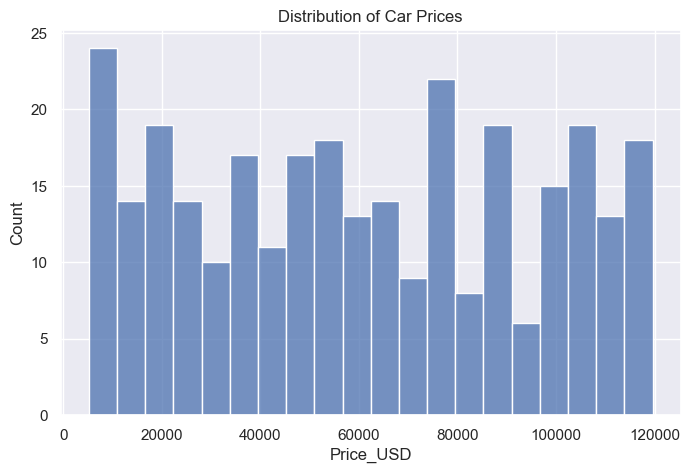

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_USD'], bins=20)
plt.title("Distribution of Car Prices")
plt.show()


2-Engine power distribution

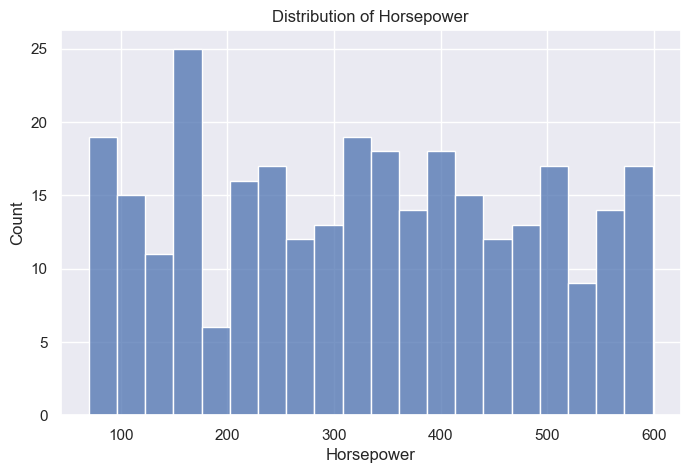

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Horsepower'], bins=20)
plt.title("Distribution of Horsepower")
plt.show()


Bivariate Analysis:

1-Average price depending on fuel type

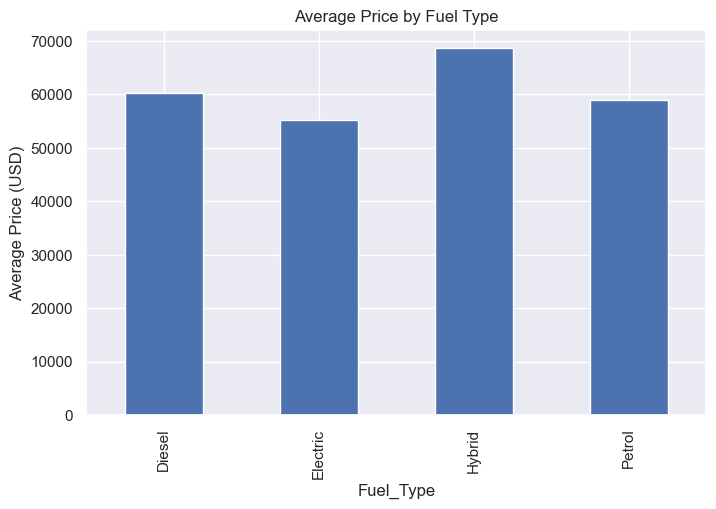

In [21]:
fuel_price = df.groupby('Fuel_Type')['Price_USD'].mean()

plt.figure(figsize=(8,5))
fuel_price.plot(kind='bar')
plt.title("Average Price by Fuel Type")
plt.ylabel("Average Price (USD)")
plt.show()


2-Price depends on the company

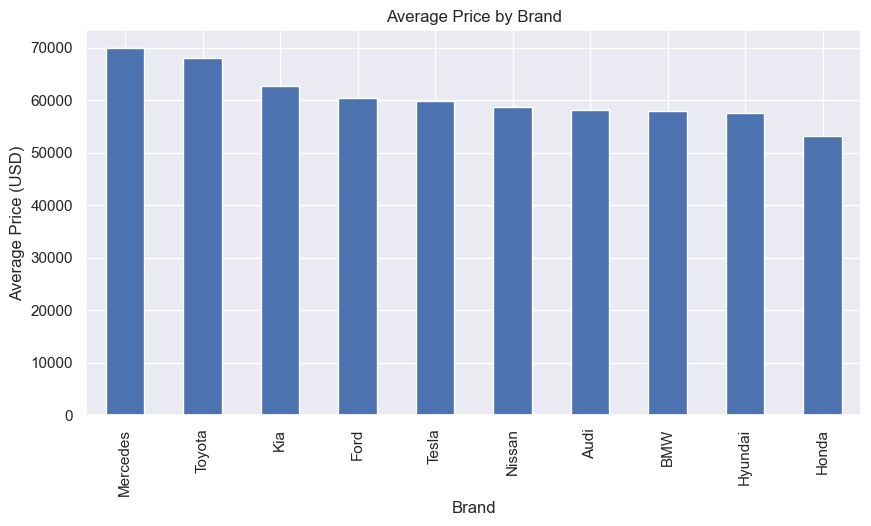

In [22]:
brand_price = df.groupby('Brand')['Price_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
brand_price.plot(kind='bar')
plt.title("Average Price by Brand")
plt.ylabel("Average Price (USD)")
plt.show()


Price vs engine power

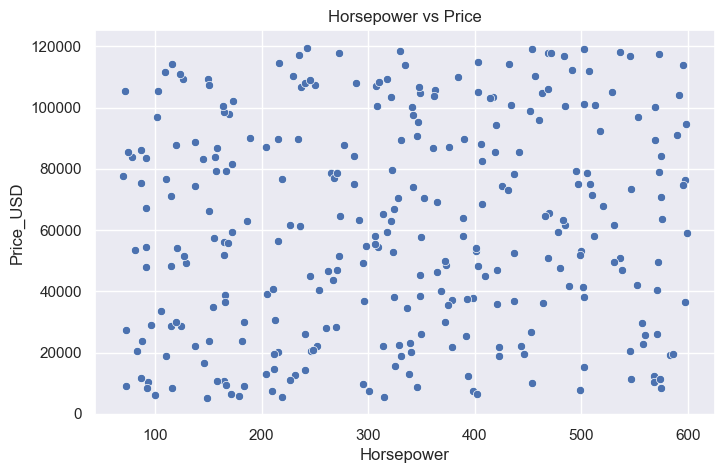

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Horsepower', y='Price_USD', data=df)
plt.title("Horsepower vs Price")
plt.show()


Correlation Matrix

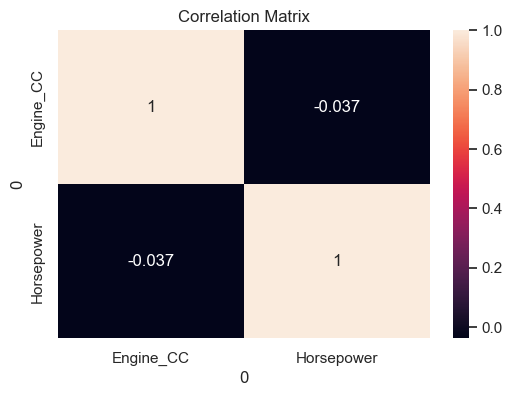

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Engine_CC', 'Horsepower']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

Time-Based Analysis

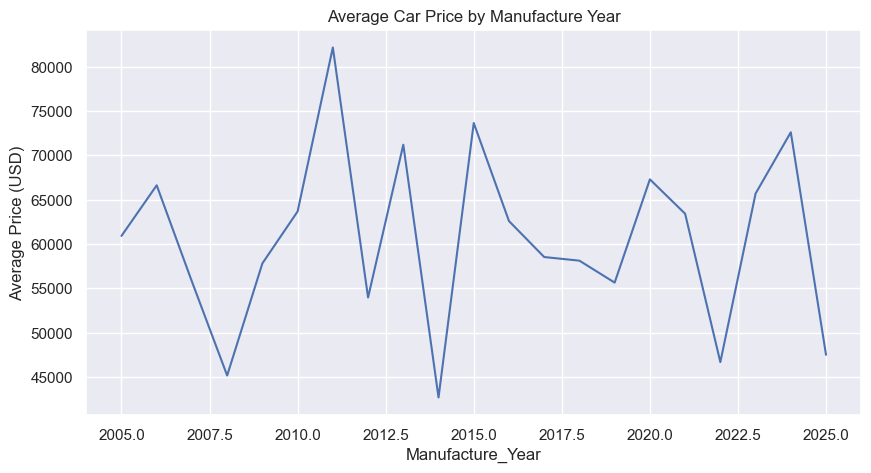

In [28]:
year_price = df.groupby('Manufacture_Year')['Price_USD'].mean()

plt.figure(figsize=(10,5))
year_price.plot()
plt.title("Average Car Price by Manufacture Year")
plt.ylabel("Average Price (USD)")
plt.show()
